In [33]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
#load dataset
boston = pd.read_csv ('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### DATA OVERVIEW

In [35]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [36]:
boston.describe().reset_index()

,index,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
1,mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
2,std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
3,min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
4,25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
5,50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
6,75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
7,max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### SPLIT DATA

In [37]:
# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

feature_boston_train, feature_boston_test, target_boston_train, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [38]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


There are several features with high VIF scores :
1. nox
2. dis
3. rad
4. tax

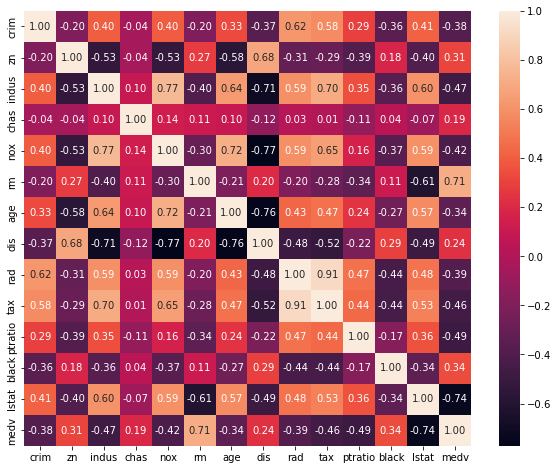

In [39]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Between tax and rad, both are highly collerated each other (0.91). Here, I choose to retain 'tax', so I want to drop 'rad'.

In [40]:
# drop redundant features
feature_boston_train = feature_boston_train.drop(columns=['rad'])
feature_boston_test = feature_boston_test.drop(columns=['rad'])

### Recheck VIF

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.593872
2,zn,2.413664
3,indus,3.658237
4,chas,1.084671
5,nox,4.411973
6,rm,1.884987
7,age,2.977080
8,dis,4.166015
9,tax,3.331299
10,ptratio,1.776290


After dropping fitur 'rad', VIF value of 'tax' drop into 3.33

### Model Training

#### Ridge Regresstion

In [42]:
from sklearn.linear_model import Ridge

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
ridge_reg = Ridge(alpha=0.1, 
                  random_state=42)

ridge_reg.fit(X_boston_train, y_boston_train)

Ridge(alpha=0.1, random_state=42)

In [43]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_boston_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,23.518308
1,crim,-0.081022
2,zn,0.022474
3,indus,-0.019493
4,chas,3.093697
5,nox,-14.404510
6,rm,4.729954
7,age,-0.010476
8,dis,-1.412181
9,tax,0.000750


1. When all features is 0, it is expected that value of 'medv' is 23.518308
2. As it shows negatif, when an increase of 1 on 'crim' (crime rate by town) meaning that a decrease of 'medv' valued 0.081. Artinya, ketika rata-rata tingkat kriminal dalam sebuah kota naik 1, maka terjadi penurunan rata-rata harga rumah senilai -0.081022 * $1000 = $81,022 dollars
3. When an increase of 1 on 'zn' (luas tanah kavling) meaning that an increase of 'medv' valued 0.022474. Artinya, tiap 1 * 25,000 sq.ft.(tanah kavling) bersumbangsi pada kenaikan harga rata-rata (medv) 0.022474 * $1000 = $22,474 dollars

### Lasso 

In [44]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=0.1, 
                  random_state=42)

lasso_reg.fit(X_boston_train, y_boston_train)

Lasso(alpha=0.1, random_state=42)

### Train Multiple Models with different alpha (lambda) = 0.01, 0.1, 1, 10

In [45]:
from sklearn.linear_model import Lasso

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_boston_train, y_boston_train)
lasso_reg_pointone.fit(X_boston_train, y_boston_train)
lasso_reg_one.fit(X_boston_train, y_boston_train)
lasso_reg_ten.fit(X_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

### Find the best model (alpha) Based on Validation test

In [46]:
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.8163663712178995
RMSE of Lasso regression model with alpha = 0.1 is 4.811559973015987
RMSE of Lasso regression model with alpha = 1.0 is 4.795136609843343
RMSE of Lasso regression model with alpha = 10 is 5.433983389465047


The lasso regression model with alpha = 1.0 is the best lasso regression model

### Evaluation Model with Lasso

In [47]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_boston_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.425577
1,crim,-0.075710
2,zn,0.027093
3,indus,-0.061336
4,chas,1.266833
5,nox,-0.000000
6,rm,4.564419
7,age,-0.016919
8,dis,-1.155550
9,tax,-0.002088


## Workflow with choosing the best lambda

### Split data: train-validation-test

In [48]:
# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size=0.20, random_state=42)

### Drop Multicollinear Features

In [49]:
feature_boston_train = feature_boston_train.drop(columns=['rad'])
feature_boston_validation = feature_boston_validation.drop(columns=['rad'])
feature_boston_test = feature_boston_test.drop(columns=['rad'])

### Train Multiple Models with different alpha (lambda)

### lambdas = [0.01, 0.1, 1, 10]

In [50]:
from sklearn.linear_model import Ridge

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_boston_train, y_boston_train)
ridge_reg_pointone.fit(X_boston_train, y_boston_train)
ridge_reg_one.fit(X_boston_train, y_boston_train)
ridge_reg_ten.fit(X_boston_train, y_boston_train)

Ridge(alpha=10, random_state=42)

### Find the best model (alpha) based on validation set

In [51]:
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957845
RMSE of Ridge regression model with alpha = 0.1 is 4.94941253512279
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579992
RMSE of Ridge regression model with alpha = 10 is 4.871717983886227


The rigde regression model with alpha = 10 is the best ridge regression model

### Model Evaluation

In [52]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


### Diagnostic Study

In [53]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_boston_train, y_predict_train)))

R-squared for training data is 0.7485875263669821


1. R-squared menunjukkan bahwa 75% fitur-fitur telah mampu bersumbangsi kepada variabel target. Artinya fitur-fitur yang ada dalam data telah mampu menjelaskan prediksi harga rumah (medv).
2. 25% nya merupakan fitur-fitur lain yang tidak diukur dalam pengaruhnya pada variabel target.
3. Kemudian, jiika determinan R-squared > 70% maka variabel lainya yang dianggap pengganggu (heteroskedastisitas) tidak terlalu mempengaruhi estimasi yaitu model estimasi bebas dari masalah heteroskedastisitas.

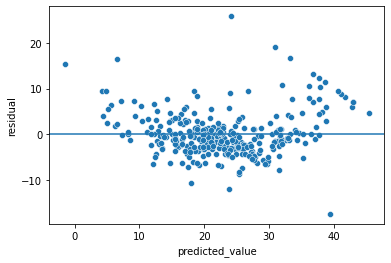

In [54]:
# calculate residuals
residual = y_boston_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Berdasarkan output Scatterplots di atas diketahui bahwa:
1. Titik-titik data penyebar di atas dan di bawah atau di sekitar garis angka 0
2. Penyebaran titik-titik data tidak membentuk pola bergelombang melebar kemudian menyempit dan melebar kembali
3. Penyebaran titik-titik data tidak berpola

maka dari itu, dapat dikatakan bahwa tidak terjadi masalah heteroskedastistas sehingga model regresi dapat dikatakan sudah baik dan ideal untuk terpenuhi

In [55]:
df_resid.head()

,predicted_value,residual
0,16.672429,2.227571
1,20.956937,-2.556937
2,10.459169,2.940831
3,14.768375,2.831625
4,27.768524,-4.968524


### Training Error

In [56]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_boston_train)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)))

RMSE for training data is 4.77864036104011
MAE for training data is 3.3776762058865626
MAPE for training data is 0.16868073663359498


Interpretasi MAPE yaitu semakin kecil nilai presentasi kesalahan (percentage error) pada MAPE maka semakin akurat hasil peramalan tersebut dengan interval persentase 10 - 30%. Artinya training error yang dilakukan pada data ini sebesar 16,86%, maka peramalan yang dilakukan sudah baik.

### Testing Error

In [58]:
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = ridge_best.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE for testing data is 5.158908333657055
MAE for testing data is 3.244481645704497
MAPE for testing data is 0.17618402626767923


Testing error yang dilakukan pada data ini sebesar 17,61%, maka peramalan yang dilakukan sudah baik.

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_boston_test, y_predict_test)
mean_absolute_percentage_error(y_boston_test, y_predict_test)

0.17618402626767923

Interpretation:
1. Based on RMSE or standard deviations of predicting error is 5.15, meaning that the residual is about 5.15.
2. Training and testing data are not much different meaning that no indicated as an overfitting and underfitting.